In [1]:
% load_ext rpy2.ipython

In [2]:
%%R
library("phyloseq")
library(ggplot2)
library(plotly)
library(vegan)

/Users/Thea/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
Attaching package: ‘plotly’


  warnings.warn(x, RRuntimeWarning)
/Users/Thea/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: The following object is masked from ‘package:ggplot2’:

    last_plot


  warnings.warn(x, RRuntimeWarning)
/Users/Thea/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: The following object is masked from ‘package:stats’:

    filter


  warnings.warn(x, RRuntimeWarning)
/Users/Thea/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: The following object is masked from ‘package:graphics’:

    layout


  warnings.warn(x, RRuntimeWarning)
/Users/Thea/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: permute

  warnings.warn(x, RRuntimeWarning)
/Users/Thea/anaconda3/lib/python3.6/site-pack

In [3]:
%%R
physeq = import_biom("../../SeqData/otu_table.tax.meta.biom", parseFunction = parse_taxonomy_greengenes, tree = "../../SeqData/trees/fulltree.tre")

In [4]:
%%R
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 5452 taxa and 72 samples ]
sample_data() Sample Data:       [ 72 samples by 3 sample variables ]
tax_table()   Taxonomy Table:    [ 5452 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 5452 tips and 5450 internal nodes ]


In [5]:
%%R
# Normalizes the sample counts by the total - i.e., reporting what fraction of each sample each OTU makes up.
ps_snorm = transform_sample_counts(physeq, function(x) x / sum(x))

In [6]:
%%R
# Computing the Bray d#istance matrix and NMDS in parallel

#ord.full = ordinate(ps_snorm, method = "NMDS", distance = "bray", weighted=TRUE, k=3, trymax=40)
ord.full = ordinate(ps_snorm, method = "NMDS", distance = "bray", weighted=TRUE, k=3, trymax=40)
# Consider trymax= and k=3

Run 0 stress 0.09565493 
Run 1 stress 0.09563871 
... New best solution
... Procrustes: rmse 0.002914409  max resid 0.02092372 
Run 2 stress 0.0960168 
... Procrustes: rmse 0.00579541  max resid 0.03767436 
Run 3 stress 0.1048273 
Run 4 stress 0.1051232 
Run 5 stress 0.09564957 
... Procrustes: rmse 0.009418962  max resid 0.05560401 
Run 6 stress 0.09565582 
... Procrustes: rmse 0.003292944  max resid 0.02432955 
Run 7 stress 0.1076037 
Run 8 stress 0.0956557 
... Procrustes: rmse 0.003228622  max resid 0.02314075 
Run 9 stress 0.09571458 
... Procrustes: rmse 0.006046337  max resid 0.0376848 
Run 10 stress 0.1058479 
Run 11 stress 0.0957155 
... Procrustes: rmse 0.006066623  max resid 0.0375708 
Run 12 stress 0.09563767 
... New best solution
... Procrustes: rmse 0.0002347242  max resid 0.001385374 
... Similar to previous best
Run 13 stress 0.09558961 
... New best solution
... Procrustes: rmse 0.00858929  max resid 0.05413728 
Run 14 stress 0.1059461 
Run 15 stress 0.09628256 
Run 1

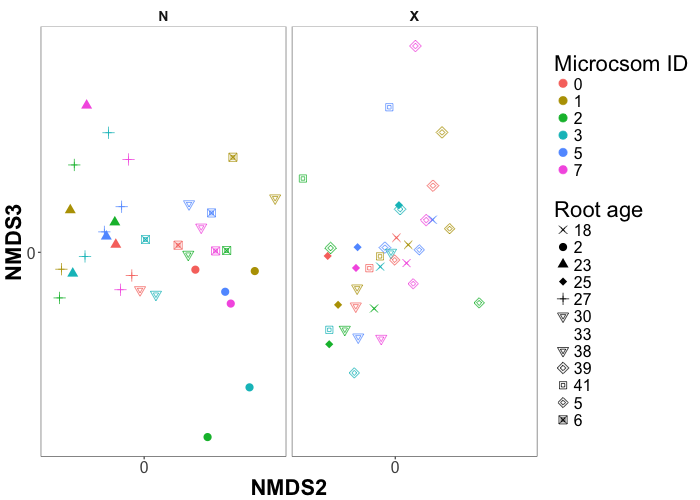

In [35]:
%%R -h 500 -w 700
D <- ord.full
# Sets the relevant ordination

#sample_data(ps_snorm)$Cosm=as.factor(sample_data(ps_snorm)$Cosm)
sample_data(ps_snorm)$Day=as.factor(sample_data(ps_snorm)$Day)

# Creates an plot object, using the df.sites data, with the x and y axes specified as the PCoA axes,
p = plot_ordination(ps_snorm, D, shape = "Cosm", color = "Day", axes=c(2,3))
#p = plot_ordination(ps_snorm, D, color = "Day", shape = "Trtmt")

# Determines the size of the symbols
p = p  + geom_point(size=3.5) 
#+ scale_colour_manual(values=c("skyblue3","darkorange","chartreuse4","red3","black","gold1"))

#p = p + geom_polygon(aes(fill=Day, group=Day, alpha=0.5))

p = p + guides(colour = guide_legend("Microcsom ID"), shape = guide_legend("Root age"))
#p = p + scale_shape_manual(values=c(19,4,17,15,3))

p = p + scale_x_continuous(breaks=c(-4,-3,-2,-1,0,1))
p = p + scale_y_continuous(breaks=c(-1,0,1))
p = p + scale_shape_manual(values = c(4,16,17,18,3,6,28,6,5,22,23,7,1))

#"1","2","3","4","5","6","7","8","16","17","22","23"

p = p + theme_bw() +
  theme(
      legend.position = "right",
    plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
    ,strip.text.x = element_text(size=14, face="bold"),
        axis.title = element_text(size=22, face="bold"),
        axis.text = element_text(size=16),
        legend.text = element_text(size=16),
        legend.title = element_text(size = 22),
        strip.background = element_rect(colour="white", fill="white"))

p = p + facet_wrap(~Trtmt)
# Adds a "facet_wrap" to it, which means it will plot it separately by whatever we specify - here, Days

p

In [19]:
%%R
length(levels(as.factor(sample_data(ps_snorm)$Cosm)))

[1] 12


### Trying plots in 3D

In [36]:
%%R

# Computing the Bray distance matrix and NMDS in parallel

ps_snorm3D = ps_snorm

MyDist = distance(ps_snorm3D, "bray", weighted=TRUE)
MyOrd = metaMDS(MyDist, method = "NMDS", k=3, trymax=40)
# Consider trymax= and k=3

Run 0 stress 0.09565493 
Run 1 stress 0.09624752 
Run 2 stress 0.09565445 
... New best solution
... Procrustes: rmse 0.0004523575  max resid 0.00197318 
... Similar to previous best
Run 3 stress 0.09572363 
... Procrustes: rmse 0.005097561  max resid 0.03725764 
Run 4 stress 0.09558502 
... New best solution
... Procrustes: rmse 0.008820991  max resid 0.05764962 
Run 5 stress 0.0956563 
... Procrustes: rmse 0.006388969  max resid 0.03746518 
Run 6 stress 0.0956392 
... Procrustes: rmse 0.008488424  max resid 0.05835539 
Run 7 stress 0.09572071 
... Procrustes: rmse 0.009880928  max resid 0.0608924 
Run 8 stress 0.09566712 
... Procrustes: rmse 0.005403019  max resid 0.03705902 
Run 9 stress 0.09564037 
... Procrustes: rmse 0.00602312  max resid 0.03742346 
Run 10 stress 0.09565598 
... Procrustes: rmse 0.00905675  max resid 0.05892908 
Run 11 stress 0.09571466 
... Procrustes: rmse 0.009910641  max resid 0.05493446 
Run 12 stress 0.09564961 
... Procrustes: rmse 0.004978055  max resid

In [41]:
%%R
library(wesanderson)
Colours = c(wes_palette("Darjeeling"),wes_palette("Moonrise2"),wes_palette("Moonrise1"))

In [42]:
%%R

NMDS.coords = data.frame(MyOrd$points)
# Extracting the coordinates from the ordination
NMDS.coords = merge(NMDS.coords,sample_data(ps_snorm3D), by = 0)
# Merging it with the sample data, by rowname (the same)
# Should be able to make 3D plot with this.
NMDS.coords$Day = as.numeric(NMDS.coords$Day)
# Converting Day to numeric for size mapping
NMDS.coords$Cosm = as.factor(NMDS.coords$Cosm)



plot_ly(NMDS.coords, x = ~MDS1, y = ~MDS2, z = ~MDS3, color = ~Cosm, symbol = ~Trtmt, size=~Day
        ,colors = Colours
        ,symbols = c("circle","square")
        ,sizes = c(400,800)
       )%>%
    layout(scene = list(xaxis = list(title = "NMDS1"), yaxis = list(title = "NMDS2"),
          zaxis = list(title = "NMDS3")))

In [33]:
%%R
# What about running a PCoA?

ps_snorm3D = ps_snorm

MyOrd = ordinate(ps_snorm3D, method = "PCoA", dist="wunifrac")

In [34]:
%%R

PCoA.coords = data.frame(MyOrd$vectors[,1:3])
# Extracting the coordinates from the ordination
PCoA.coords = merge(PCoA.coords,sample_data(ps_snorm3D), by = 0)
# Merging it with the sample data, by rowname (the same)
# Should be able to make 3D plot with this.
PCoA.coords$Day = as.numeric(PCoA.coords$Day)
# Converting Day to numeric for size mapping
PCoA.coords$Cosm = as.factor(PCoA.coords$Cosm)



In [35]:
%%R
plot_ly(PCoA.coords, x = ~Axis.1, y = ~Axis.2, z = ~Axis.3, color = ~Cosm, symbol = ~Trtmt, size=~Day
        #,colors = c("red3","tan4","darkorange","skyblue3","chartreuse4","black")
        ,symbols = c("circle","square")
        ,sizes = c(400,800)
       )%>%
    layout(scene = list(xaxis = list(title = "PCo1"), yaxis = list(title = "PCo2"),
          zaxis = list(title = "PCo3")))

One hypothesis might be that the root communities do converge (are more similar) than the bulk soils.

### What if we ask the question whether N additions affected short-term response to root growth (days 1 and 2)

In [11]:
%%R
pshort = prune_samples(sample_data(ps_snorm)$Day==1|sample_data(ps_snorm)$Day==2|sample_data(ps_snorm)$Day==3, ps_snorm)
pshort


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 5452 taxa and 36 samples ]
sample_data() Sample Data:       [ 36 samples by 3 sample variables ]
tax_table()   Taxonomy Table:    [ 5452 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 5452 tips and 5450 internal nodes ]


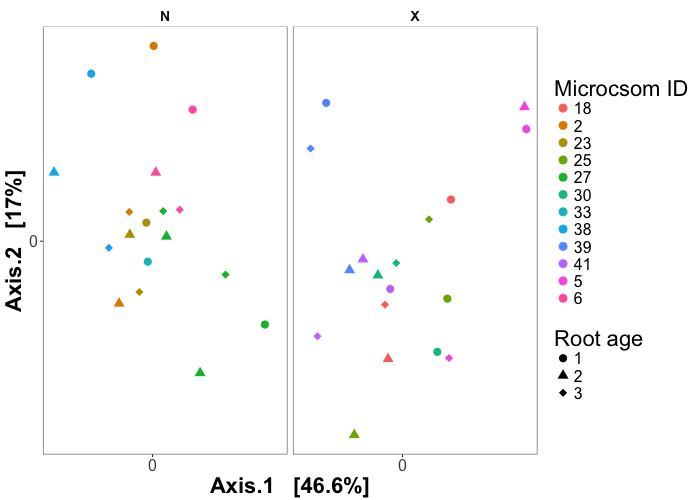

In [17]:
%%R -h 500 -w 700

ord.full = ordinate(pshort, method = "PCoA", distance = "unifrac", weighted=TRUE)

D <- ord.full
# Sets the relevant ordination

#sample_data(ps_snorm)$Cosm=as.factor(sample_data(ps_snorm)$Cosm)
sample_data(pshort)$Day=as.factor(sample_data(pshort)$Day)

# Creates an plot object, using the df.sites data, with the x and y axes specified as the PCoA axes,
p = plot_ordination(pshort, D, shape = "Day", color = "Cosm", axes=c(1,2))
#p = plot_ordination(ps_snorm, D, color = "Day", shape = "Trtmt")

# Determines the size of the symbols
p = p  + geom_point(size=3.5) 
#+ scale_colour_manual(values=c("skyblue3","darkorange","chartreuse4","red3","black","gold1"))

#p = p + geom_polygon(aes(fill=Day, group=Day, alpha=0.5))

p = p + guides(colour = guide_legend("Microcsom ID"), shape = guide_legend("Root age"))
#p = p + scale_shape_manual(values=c(19,4,17,15,3))

p = p + scale_x_continuous(breaks=c(-4,-3,-2,-1,0,1))
p = p + scale_y_continuous(breaks=c(-1,0,1))
p = p + scale_shape_manual(values = c(16,17,18,4,3,6,28,6,5,22,23,7,1))

#"1","2","3","4","5","6","7","8","16","17","22","23"

p = p + theme_bw() +
  theme(
      legend.position = "right",
    plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
    ,strip.text.x = element_text(size=14, face="bold"),
        axis.title = element_text(size=22, face="bold"),
        axis.text = element_text(size=16),
        legend.text = element_text(size=16),
        legend.title = element_text(size = 22),
        strip.background = element_rect(colour="white", fill="white"))

p = p + facet_wrap(~Trtmt)
# Adds a "facet_wrap" to it, which means it will plot it separately by whatever we specify - here, Days

p

In [ ]:
# We might be able to say that, within a microcosm, there is a consistent response to the root?
# We could maybe say that the communities from day X are more similar to communities from day Y?